In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Parte 1

## 1) ¿Cuál es el tamaño en bytes de un array de 1000
## elementos de tipo booleano?

In [4]:
boolArray = np.full(1000, True, dtype=bool)
sizeInBytes = boolArray.nbytes
print("El tamaño en bytes del array de 1000 elementos de tipo booleano es:", sizeInBytes)

El tamaño en bytes del array de 1000 elementos de tipo booleano es: 1000


## Cree un array cuyos elementos sean los enteros pares en [1,100] y en orden decreciente. Muestre los 10 últimos por pantalla.

In [6]:
arrayOfPairs = np.arange(100, 0, -2)

lastTenElements = arrayOfPairs[-10:]

print(f"Los ultimos 10 elementos son: {lastTenElements}")

Los ultimos 10 elementos son: [20 18 16 14 12 10  8  6  4  2]


## Dado el array
2456

0374

8852

1561

Seleccione con una instrucción el subarray de elementos 0374

In [17]:
array = np.array([[2, 4, 5, 6],
                  [0, 3, 7, 4],
                  [8, 8, 5, 2],
                  [1, 5, 6, 1]])
print("Array 0374 extracted: ", array[1])


Array 0374 extracted:  [0 3 7 4]


## Después, seleccione el subarray de elementos

2 5

8 5


In [47]:
subArray1 = array[[0, 2], [0, 2]]
subArray2 = array[[2, 2], [0, 2]]
subArray = np.column_stack((subArray1, subArray2))
print(subArray)

[[2 8]
 [5 5]]


## Dados los arrays a = [1, 4, 2, 7] y b = [1, 3, 2, 9], obtenga la media aritmética de la diferencia (a-b).

In [50]:
a = np.array([1, 4, 2, 7])
b = np.array([1, 3, 2, 9])
substraction = (a - b)
mean = np.mean(substraction)

print("La media aritmetica de (a-b) es: ", mean)


La media aritmetica de (a-b) es:  -0.25


In [52]:
arrayOfCoordinates = np.array([[1.33, 4.5],
                        [30.0, 10.7],
                        [70.2, 0.5]])

print("Coordinates: ", arrayOfCoordinates)

Coordinates:  [[ 1.33  4.5 ]
 [30.   10.7 ]
 [70.2   0.5 ]]


In [53]:
finalCoordinates = np.append(arrayOfCoordinates, [[37.1, -3.6]], axis=0)

Agregue a este array las coordenadas (37.1, -3.6).
Muestre en pantalla las dimensiones del nuevo
array

In [54]:
print(finalCoordinates)

[[ 1.33  4.5 ]
 [30.   10.7 ]
 [70.2   0.5 ]
 [37.1  -3.6 ]]


## Copie el array del ejercicio anterior. Traspóngalo (. Agregue ahora dos nuevos pares de coordenadas: (10.8, 3.0) y (35.8, 12.0).

In [57]:
transposed = np.transpose(arrayOfCoordinates)

newPairs = np.array([[10.8, 3.0], [35.8, 12.0]])

finalCoordinates2 = np.append(transposed, newPairs, axis=1)

print(finalCoordinates2)

[[ 1.33 30.   70.2  10.8   3.  ]
 [ 4.5  10.7   0.5  35.8  12.  ]]


# Parte 2

## Cargando archivo

In [85]:
dataset = pd.read_csv('./assets/NucleosPoblacion.csv')

dataset.columns

Index(['FID', 'OBJECTID', 'Texto', 'Poblacion', 'CodMun', 'Municipio',
       'CodProvin', 'Provincia', 'X', 'Y'],
      dtype='object')

In [87]:
dataset.head()

,FID,OBJECTID,Texto,Poblacion,CodMun,Municipio,CodProvin,Provincia,X,Y
0,0,1,Agüimes,29431.0,35002,Agüimes,35,Las Palmas,-15.446012,27.900542
1,1,2,Antigua,10458.0,35003,Antigua,35,Las Palmas,-14.013301,28.418966
2,2,3,Arrecife,58156.0,35004,Arrecife,35,Las Palmas,-13.551451,28.960649
3,3,4,Arucas,36745.0,35006,Arucas,35,Las Palmas,-15.521512,28.117496
4,4,5,Gáldar,24473.0,35009,Gáldar,35,Las Palmas,-15.654111,28.143873


## ¿Cuántos Municipios tienen más de 100000 habitantes?

In [64]:
municipios = dataset[dataset['Poblacion'] > 10000]

print("Número de municipios con más de 10000: ", municipios.size)

Número de municipios con más de 10000:  8520


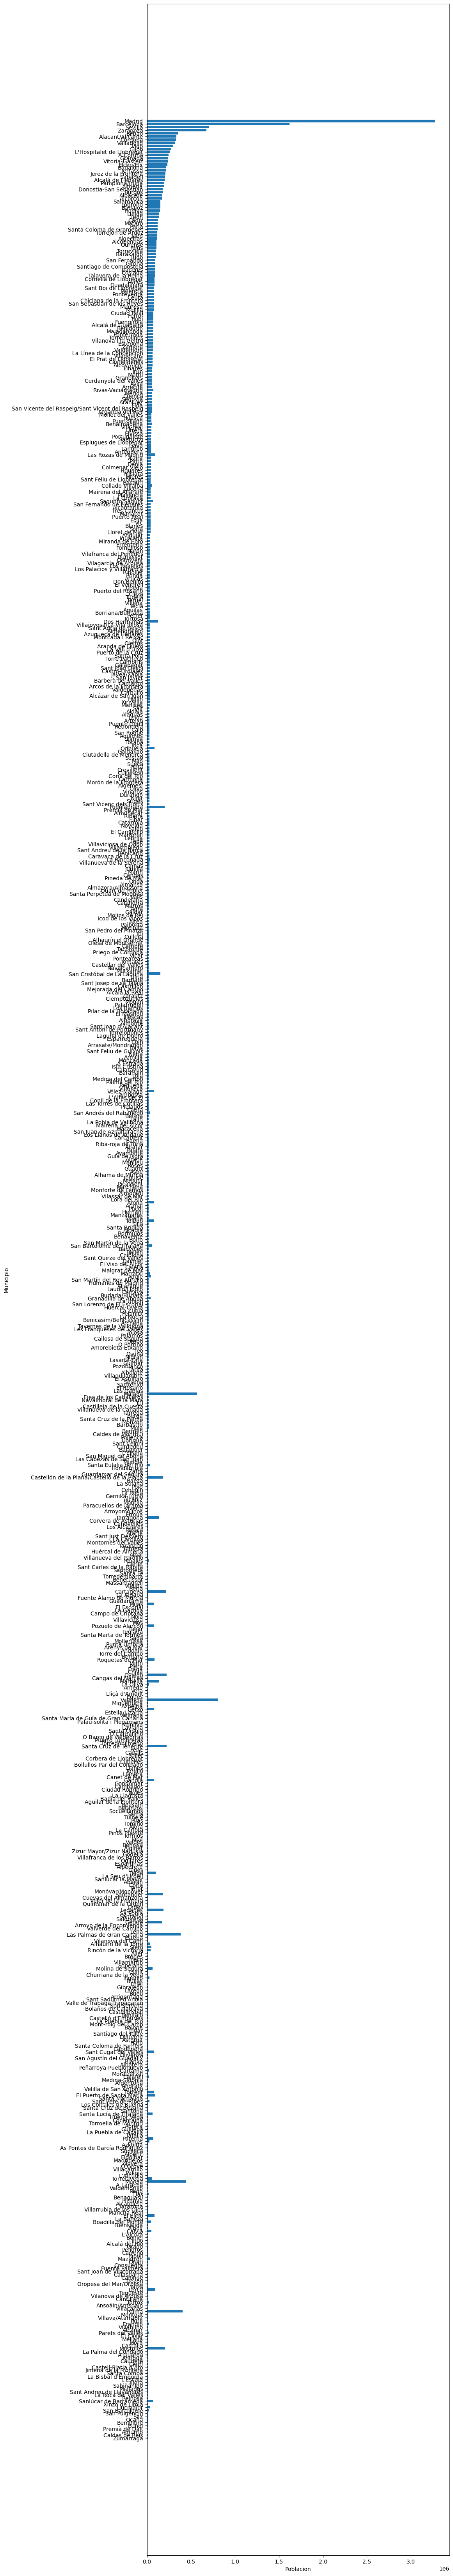

In [79]:
dataSortedByPopulation = dataset.sort_values(by="Poblacion")

plt.figure(figsize=(10,85))
plt.barh(dataSortedByPopulation['Municipio'], dataSortedByPopulation['Poblacion'])
plt.xlabel('Poblacion')
plt.ylabel('Municipio')
plt.show()


In [81]:
secondCityMostPopulated = dataSortedByPopulation.iloc[-2]['Municipio']
print("Segunda mas poblada: ", secondCityMostPopulated)

Segunda mas poblada:  Barcelona


In [84]:
rankingGranada = dataSortedByPopulation[dataSortedByPopulation['Municipio'] == 'Granada'].index[0]

print("Posicion de granada: ", rankingGranada + 1)

Posicion de granada:  273


In [ ]:
extremaduraMuni = dataset[dataset['Comunidad Autonoma']]

## 4. ¿Cuál es el municipio situado más al Norte? (Usar el valor de la coordenada "Y" que representa la latitud en grados).
## Proporcione también la provincia a la que pertenece y su población.

In [94]:
northernMuni = dataset.loc[dataset['Y'].idxmax()]

print("Municipio mas al norte: ", northernMuni['Municipio'])
print("Provincia: ", northernMuni['Provincia'])
print("Poblacion: ", northernMuni['Poblacion'])

Municipio mas al norte:  Viveiro
Provincia:  Lugo
Poblacion:  16211.0


## 5) Obtenga la media, mediana, desviación estándar, valor máximo y valor mínimo de la población de los municipios de la provincia de Granada

In [95]:
munisGranada = dataset[dataset['Provincia'] == 'Granada']

population = munisGranada['Poblacion']

mean = population.mean()
median = population.median()
std = population.std()
maxPopulation = population.max()
minPopulation = population.min()

print("Estadisticas de granada")
print("Media: ", mean)
print("Mediana: ", median)
print("Desviacion estandar: ", std)
print("Valor maximo: ", maxPopulation)
print("Valor minimo: ", minPopulation)

Estadisticas de granada
Media:  30217.85
Mediana:  17526.0
Desviacion estandar:  50355.49171459277
Valor maximo:  239154.0
Valor minimo:  10386.0


## Realice un histograma con la población de los Municipios para cada una de las provincias

Text(0.5, 1.0, 'Histograma de población de los municipios por provincia')

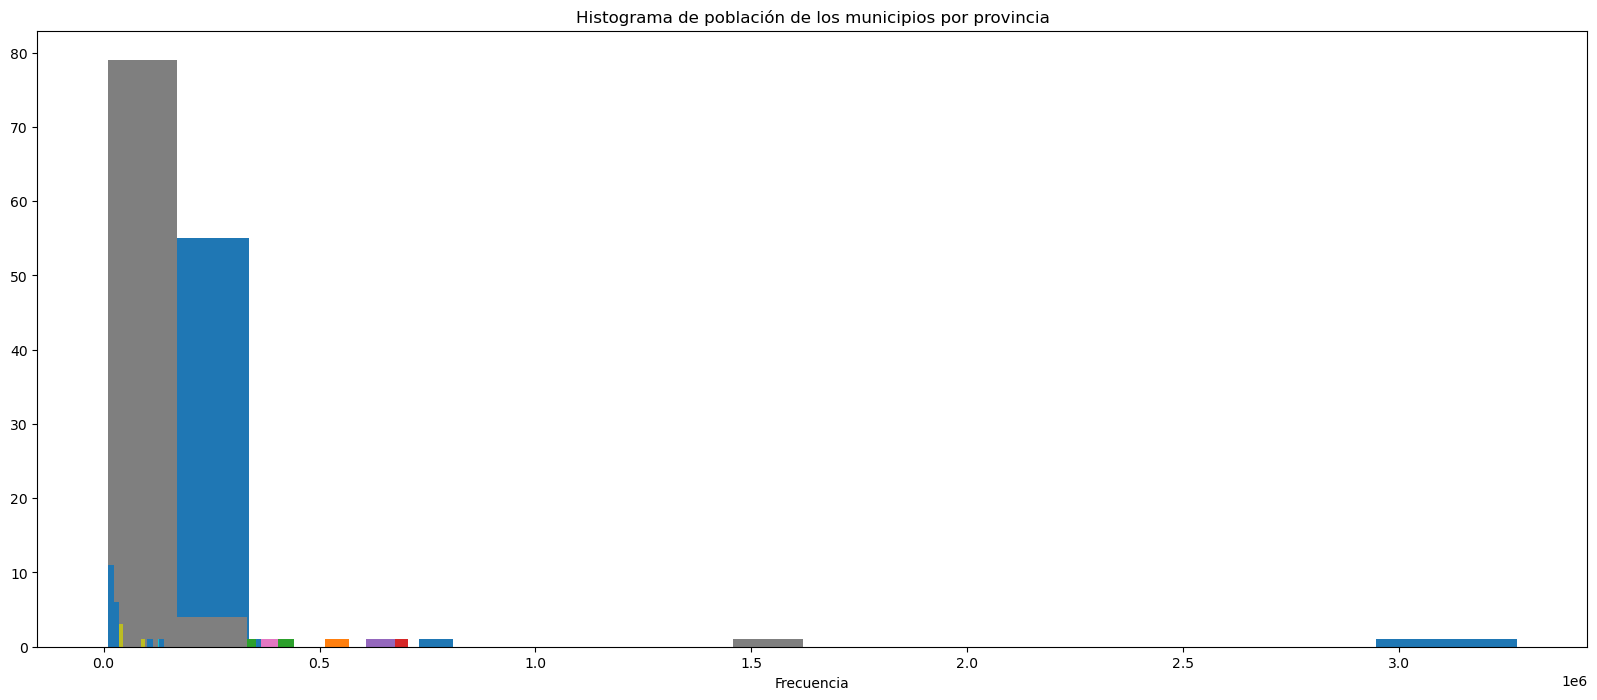

In [99]:
provincias = dataset['Provincia'].unique()

plt.figure(figsize=(20,8))
plt.xlabel('Poblacion')
plt.xlabel('Frecuencia')

for provincia in provincias:
    munisProvincias = dataset[dataset['Provincia'] == provincia]
    plt.hist(munisProvincias['Poblacion'], label=provincia)

plt.title("Histograma de población de los municipios por provincia")



## Seleccione al azar cincuenta municipios diferentes de entre los diponibles en el archivo. Asegúrese de que no se repitan. ¿Luego calcule el promedio de la población y la desviación estándar de esto 50 municipios?

In [102]:
randomIndex = np.random.choice(len(dataset), size=50, replace=False)
randomMunis = dataset.iloc[randomIndex]

meanPopulation = randomMunis['Poblacion'].mean()
stdPopulation = randomMunis['Poblacion'].std()

print("Promedio poblacion de los 50 municipios: ", meanPopulation)
print("Desviación estandar de la poblacion de los 50 municipios: ", stdPopulation)


Promedio poblacion de los 50 municipios:  37337.06
Desviación estandar de la poblacion de los 50 municipios:  50913.647536248136
